In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
# from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os


In [157]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [158]:
# Creating training set
training_set = train_datagen.flow_from_directory('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 544 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [159]:
training_set.class_indices

{'earwax': 0, 'normal': 1}

In [160]:
history = load_model('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/binary_classification.hdf5')

In [161]:
print(history.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       3328      
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        32832     
                                                           

In [162]:
# model.save('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [163]:
# history = load_model('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [164]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/validation', # Put your path here
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = history.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# predictions = model.predict(test_set, steps=test_steps_per_epoch)

def convert_array(arr_2d):
    arr_1d = np.zeros(arr_2d.shape[0])
    arr_1d[arr_2d[:, 0] >= 1] = 1
    return arr_1d

# predicted_classes = np.argmax(predictions, axis = 1)
predicted_classes = convert_array(predictions)

Found 125 images belonging to 2 classes.


C:\Users\harsh\AppData\Local\Temp\ipykernel_29296\3902023841.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = history.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [165]:
predictions

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.3121120e-07],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [166]:
predicted_classes

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0.])

In [167]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [168]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [169]:
# class_labels

In [170]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

      earwax       0.46      1.00      0.63        25
      normal       1.00      0.71      0.83       100

    accuracy                           0.77       125
   macro avg       0.73      0.85      0.73       125
weighted avg       0.89      0.77      0.79       125



In [171]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [172]:
class_labels

['earwax', 'normal']

<AxesSubplot: >

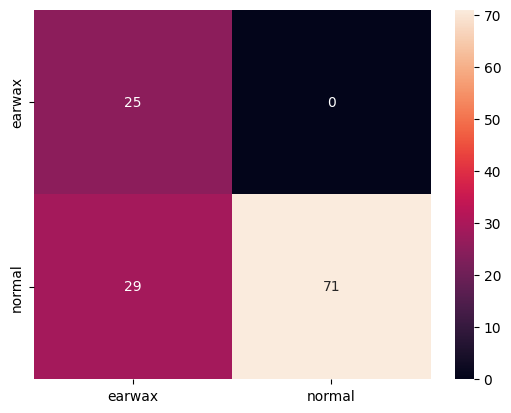

In [173]:
from sklearn.metrics import confusion_matrix
# y_prded_labels = predicted_classes
# y_test = true_classes
# plt.figure(figsize(16 , 9))
import seaborn as sns
cm = confusion_matrix(true_classes , predicted_classes)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels = class_labels)

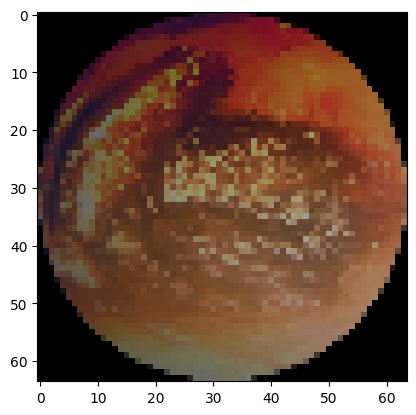

1/1 [==============================] - 0s 94ms/step
earwax (34).png
abnormal


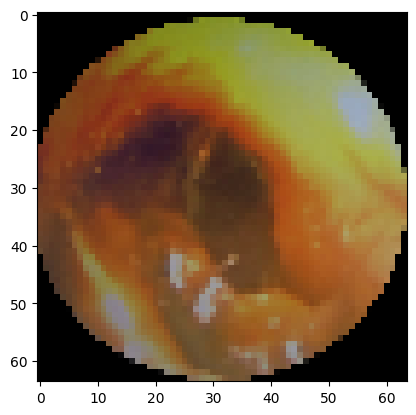

1/1 [==============================] - 0s 29ms/step
earwax (38).png
abnormal


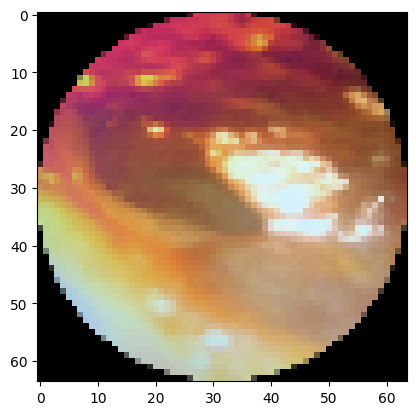

1/1 [==============================] - 0s 30ms/step
earwax (54).png
abnormal


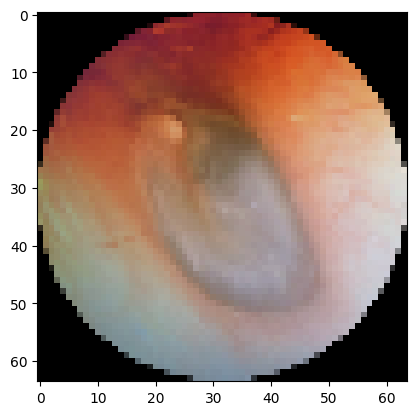

1/1 [==============================] - 0s 30ms/step
normal (130).png
abnormal


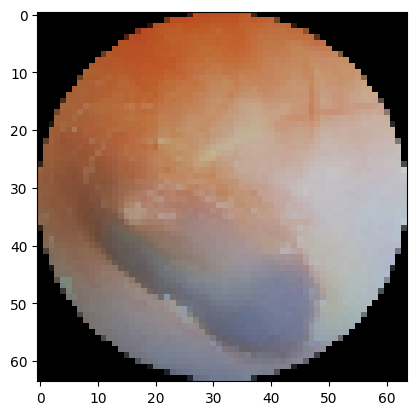

1/1 [==============================] - 0s 39ms/step
normal (138).png
normal


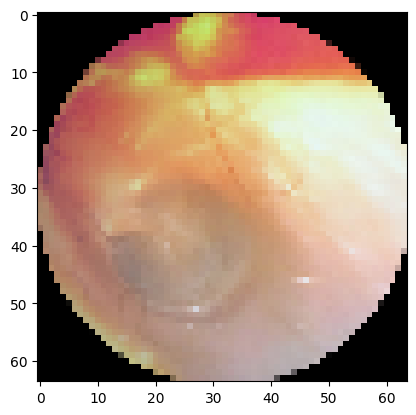

1/1 [==============================] - 0s 33ms/step
normal (603).png
normal


In [174]:
dir_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/test'

# img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# plt.imshow(img)

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = history.predict(images)
  print(i)
  if val == 0:
    print("abnormal")
  else:
    print("normal")